In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("../data/장래_인구변동_KOSIS.csv",encoding="euc-kr", index_col="인구변동요인별")

In [10]:
data_x1 = data.columns

In [12]:
data_y1 = data.iloc[1,:]
data_y1
#data.loc['출생아수(천명)']

2020    275
2030    305
2040    286
2050    236
2060    181
2070    196
Name: 출생아수(천명), dtype: int64

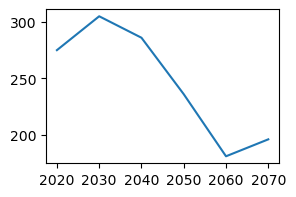

In [14]:
# 그래프 크기 조정
plt.figure(figsize=(3,2))

plt.plot(data_x1,data_y1)
plt.show()

In [15]:
# 사망자 수
# x축은 data_x1( == data.columns) 사용

# y축
data_y2 = data.iloc[2]
data_y2

2020    308
2030    408
2040    527
2050    680
2060    741
2070    702
Name: 사망자수(천명), dtype: int64

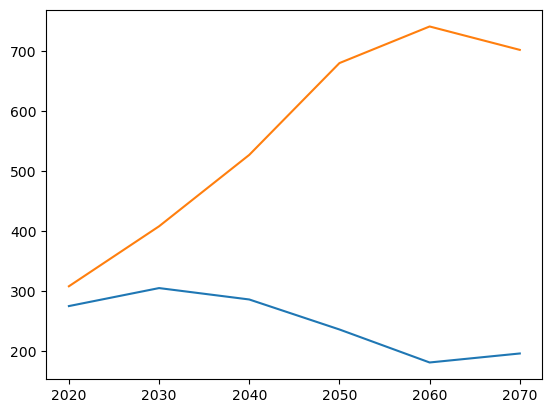

In [16]:
#출생자 수 / 사망자 수
plt.plot(data_x1,data_y1)
plt.plot(data_x1,data_y2)

In [17]:
data

,2020,2030,2040,2050,2060,2070
인구변동요인별,,,,,,
인구(천명),51836,51199,50193,47359,42617,37656
출생아수(천명),275,305,286,236,181,196
사망자수(천명),308,408,527,680,741,702


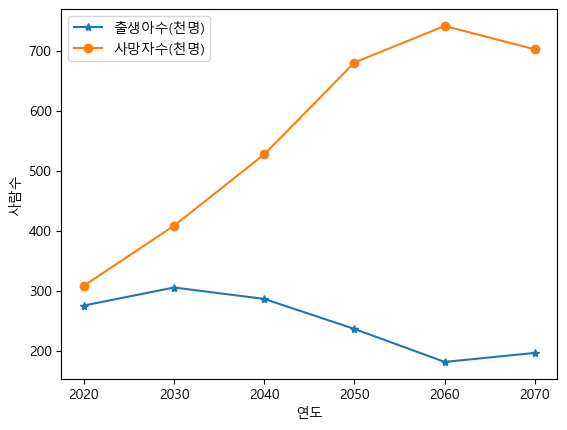

In [25]:
plt.plot(data_x1,data_y1,marker='*',label="출생아수(천명)")
plt.plot(data_x1,data_y2,marker='o',label="사망자수(천명)")

plt.rcParams['font.family'] = 'Malgun Gothic'

plt.xlabel("연도")
plt.ylabel("사람수")

plt.legend()
plt.savefig('./kosis 요인별 장래 인구 동향.png', dpi=600, bbox_inches='tight')
plt.show()


In [26]:
temp = pd.read_csv("../data/온도데이터.csv",skiprows=range(0,7),encoding='euc-kr')
temp

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1970-01-01,156,1.5,-3.2,7.4
1,\t1970-01-02,156,2.6,-0.4,8.1
2,\t1970-01-03,156,-0.1,-2.6,3.4
3,\t1970-01-04,156,-4.9,-8.8,-1.4
4,\t1970-01-05,156,-8.0,-11.8,-5.2
...,...,...,...,...,...
19832,\t2024-04-19,156,19.1,11.0,27.0
19833,\t2024-04-20,156,16.5,12.6,19.4
19834,\t2024-04-21,156,15.6,14.3,16.9
19835,\t2024-04-22,156,16.5,14.9,19.5


In [27]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19837 entries, 0 to 19836
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       19837 non-null  object 
 1   지점       19837 non-null  int64  
 2   평균기온(℃)  19837 non-null  float64
 3   최저기온(℃)  19836 non-null  float64
 4   최고기온(℃)  19836 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 775.0+ KB


In [31]:
temp[temp.iloc[:,3].isna()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
1384,\t1973-10-16,156,11.9,NaN,NaN


In [ ]:
plt.plot(temp['날짜'],temp['평균기온(℃)'])

In [43]:
#날짜 파생변수
temp['월일'] = temp["날짜"].str[-5:]

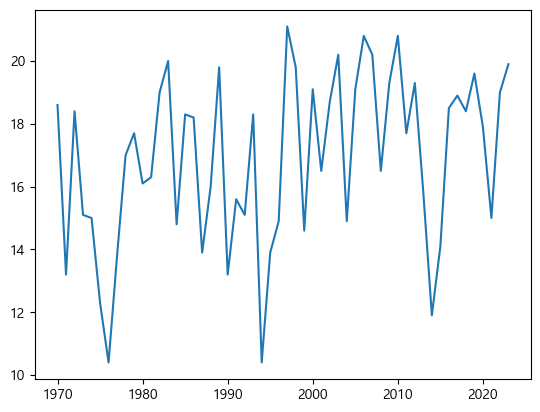

In [48]:
#본인 생일의 연도별 평균 기온

# 1. 내 생일만 불리안 인덱싱
temp.query("월일 == '05-05'")

# 2. 내 생일의 평균 기온
temp.query("월일 == '05-05'")['평균기온(℃)']

#연도별
plt.rcParams['axes.unicode_minus'] = False
plt.plot(range(1970,2024),temp.query("월일 == '05-05'")['평균기온(℃)'])
plt.show()

In [51]:
np.random.seed(3)
# 빈도수 확인 - 1~6 주사위를 100번 돌려서 빈도수 확인(랜덤수 만들기)

dice = np.random.randint(1,7,size=100)
dice


array([3, 1, 2, 4, 1, 1, 1, 6, 6, 4, 3, 4, 2, 2, 3, 6, 1, 5, 5, 6, 1, 3,
       2, 3, 3, 3, 5, 2, 4, 3, 6, 1, 2, 6, 3, 1, 4, 1, 4, 2, 4, 1, 6, 5,
       2, 6, 5, 5, 1, 1, 2, 3, 5, 6, 1, 1, 6, 6, 2, 2, 2, 6, 6, 3, 4, 5,
       5, 4, 4, 1, 1, 1, 1, 3, 3, 4, 1, 6, 6, 1, 6, 2, 5, 2, 5, 3, 3, 5,
       5, 3, 1, 5, 1, 4, 3, 1, 5, 4, 2, 6])

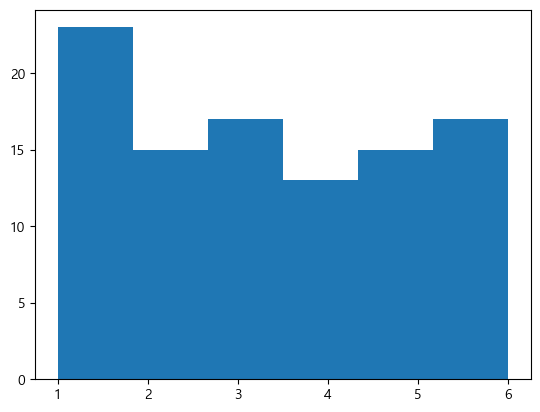

In [54]:
#plt.hist()
dice_unique = np.unique(dice, return_counts=True)
dice_unique

plt.hist(dice, bins=6)
plt.show()

In [56]:
temp['월'] = temp['월일'].str[:2]
temp

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),월일,월
0,\t1970-01-01,156,1.5,-3.2,7.4,01-01,01
1,\t1970-01-02,156,2.6,-0.4,8.1,01-02,01
2,\t1970-01-03,156,-0.1,-2.6,3.4,01-03,01
3,\t1970-01-04,156,-4.9,-8.8,-1.4,01-04,01
4,\t1970-01-05,156,-8.0,-11.8,-5.2,01-05,01
...,...,...,...,...,...,...,...
19832,\t2024-04-19,156,19.1,11.0,27.0,04-19,04
19833,\t2024-04-20,156,16.5,12.6,19.4,04-20,04
19834,\t2024-04-21,156,15.6,14.3,16.9,04-21,04
19835,\t2024-04-22,156,16.5,14.9,19.5,04-22,04


In [58]:
#월별 최고 기온의 분포
temp_04 = temp.query("월 == '04'")

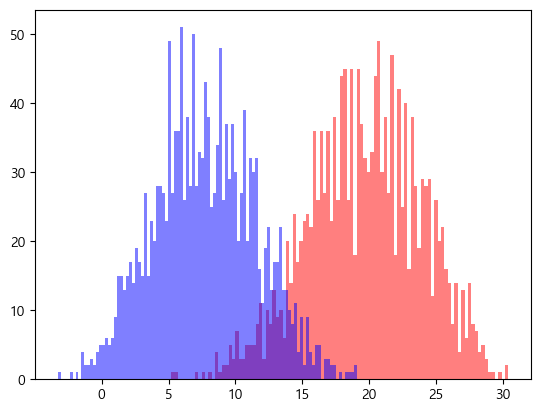

In [60]:
plt.hist(temp_04['최고기온(℃)'], bins= 100, color='red', alpha=0.5)
plt.hist(temp_04['최저기온(℃)'], bins= 100, color='blue', alpha=0.5)
plt.show()

#### Boxplot
- 상자(Box) : 데이터의 사분위 범위를 나타냅니다. 상자의 하단과 상단은 각각 제 1사분위수(Q1)와 제 3분위사수(Q3)를 나타냅니다. 상자 내부의 가로선은 중앙값을 나타냅니다.

- 수염(Whisker) : 데이터의 전체범위를 나타내며, 일반적으로 제 1사분위수에서 1.5*IQR 아래부터 제 3사분위수에서 1.5*IQR위 까지 뻗어갑니다.

- 이상치(Outliers) : 

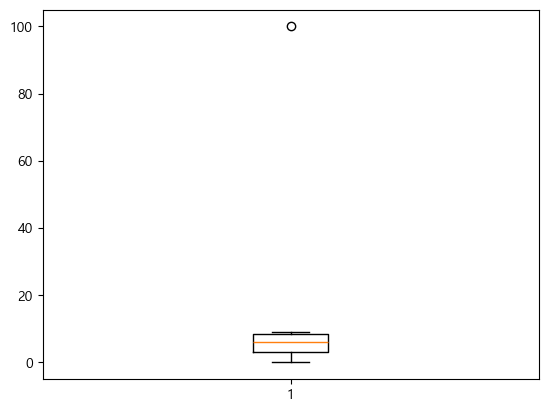

In [63]:
np.random.seed(1)
test1 = np.random.randint(10, size=10)
# print(test1)

test1 = np.append(test1,100)
# 박스 플롯
plt.boxplot(test1)
plt.show()

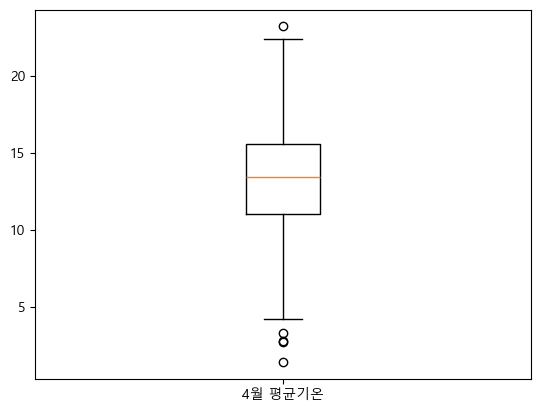

In [65]:
plt.boxplot(temp_04['평균기온(℃)'], labels=["4월 평균기온"])
plt.show()

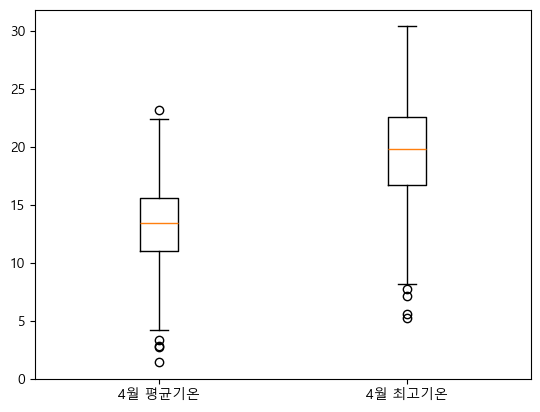

In [67]:
# 여러개의 boxplot 그리기
plt.boxplot(temp_04[['평균기온(℃)','최고기온(℃)']], labels=["4월 평균기온","4월 최고기온"])
plt.show()


#### Barplot

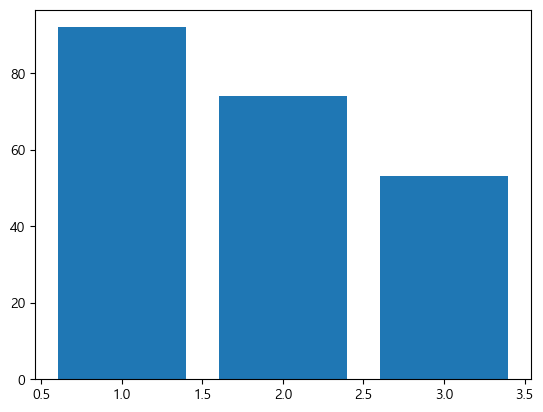

In [69]:
np.random.seed(3)
bar_x = np.arange(1,4)
bar_y = np.random.randint(50,100, size=3)

plt.bar(bar_x,bar_y)
plt.show()

In [ ]:
plt.bar(bar_x,bar_y , color=['limegreen','medium'])
plt.show()

In [ ]:
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

#### xticks, yticks
- 범주 설정


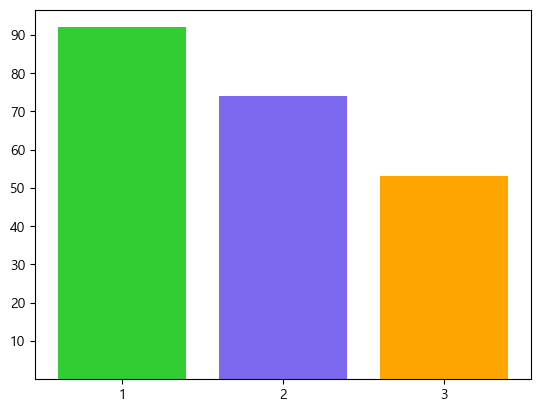

In [72]:
plt.bar(bar_x,bar_y , color=['limegreen','mediumslateblue','orange'])

plt.xticks(range(1,4))

plt.yticks(range(10,100,10))
plt.show()

[1 2 3]
[92 74 53]


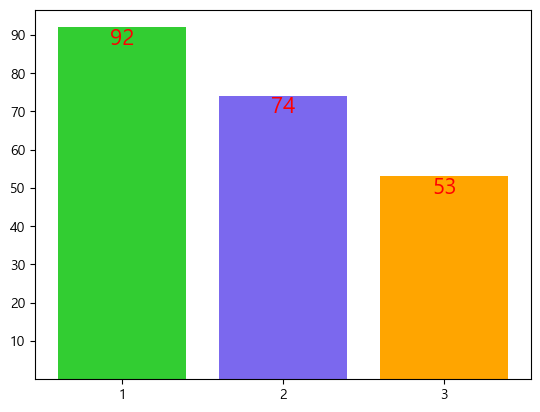

In [77]:
print(bar_x)
print(bar_y)


plt.bar(bar_x,bar_y , color=['limegreen','mediumslateblue','orange'])

plt.xticks(range(1,4))

plt.yticks(range(10,100,10))

# 글자 정렬 ha(horizontal alignment) - center, left, right
#          va(vertical alignmnet) - top, bottom, center baseline..
# 기본값은 left
#plt.text(x축 설정, y축 설정, 작성 될 데이터)
for i in range(len(bar_x)):
    plt.text(bar_x[i],bar_y[i],bar_y[i], fontdict={'color':'red','size':16}, ha='center', va="top")

plt.show()

In [78]:
economic =pd.read_csv("../data/시도_성별_경제활동인구_총괄_KOSIS_2022.csv", encoding='euc-kr')
economic

,행정구역(시도),성별,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율(％),고용률(%),실업률(%)
0,서울특별시,남자,4007,2849,2760,89,1158,71.1,68.9,3.1
1,서울특별시,여자,4440,2418,2347,72,2022,54.5,NaN,3.0
2,부산광역시,남자,1406,973,946,27,433,69.2,67.3,2.7
3,부산광역시,여자,1528,768,745,23,760,50.3,48.8,3.0
4,대구광역시,남자,1001,708,691,17,294,70.6,69.0,2.3
5,대구광역시,여자,1071,556,543,13,515,51.9,NaN,NaN
6,인천광역시,남자,1279,955,928,27,324,74.7,NaN,NaN
7,인천광역시,여자,1309,732,717,15,577,55.9,NaN,2.0
8,광주광역시,남자,623,434,423,10,190,69.6,NaN,2.4
9,광주광역시,여자,656,346,339,8,309,52.8,NaN,2.3


In [79]:
economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   행정구역(시도)      34 non-null     object 
 1   성별            34 non-null     object 
 2   15세이상인구 (천명)  34 non-null     int64  
 3   경제활동인구 (천명)   34 non-null     int64  
 4   취업자 (천명)      34 non-null     int64  
 5   실업자 (천명)      34 non-null     int64  
 6   비경제활동인구 (천명)  34 non-null     int64  
 7   경제활동참가율(％)    34 non-null     float64
 8   고용률(%)        24 non-null     float64
 9   실업률(%)        28 non-null     float64
dtypes: float64(3), int64(5), object(2)
memory usage: 2.8+ KB


In [82]:
# 고용률 전처리
# 고용률 = 취업자 /15세이상인구
economic["고용률(%)"] = round(economic['취업자 (천명)'] / economic['15세이상인구 (천명)'] * 100,1)
economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   행정구역(시도)      34 non-null     object 
 1   성별            34 non-null     object 
 2   15세이상인구 (천명)  34 non-null     int64  
 3   경제활동인구 (천명)   34 non-null     int64  
 4   취업자 (천명)      34 non-null     int64  
 5   실업자 (천명)      34 non-null     int64  
 6   비경제활동인구 (천명)  34 non-null     int64  
 7   경제활동참가율(％)    34 non-null     float64
 8   고용률(%)        34 non-null     float64
 9   실업률(%)        28 non-null     float64
dtypes: float64(3), int64(5), object(2)
memory usage: 2.8+ KB


In [85]:
# 실업률 = (취업자+실업자) / 경제활동인구
economic['실업률(%)'] = round(economic['실업자 (천명)']/economic['경제활동인구 (천명)']*100,1)
economic

,행정구역(시도),성별,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율(％),고용률(%),실업률(%)
0,서울특별시,남자,4007,2849,2760,89,1158,71.1,68.9,3.1
1,서울특별시,여자,4440,2418,2347,72,2022,54.5,52.9,3.0
2,부산광역시,남자,1406,973,946,27,433,69.2,67.3,2.8
3,부산광역시,여자,1528,768,745,23,760,50.3,48.8,3.0
4,대구광역시,남자,1001,708,691,17,294,70.6,69.0,2.4
5,대구광역시,여자,1071,556,543,13,515,51.9,50.7,2.3
6,인천광역시,남자,1279,955,928,27,324,74.7,72.6,2.8
7,인천광역시,여자,1309,732,717,15,577,55.9,54.8,2.0
8,광주광역시,남자,623,434,423,10,190,69.6,67.9,2.3
9,광주광역시,여자,656,346,339,8,309,52.8,51.7,2.3


In [86]:
economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   행정구역(시도)      34 non-null     object 
 1   성별            34 non-null     object 
 2   15세이상인구 (천명)  34 non-null     int64  
 3   경제활동인구 (천명)   34 non-null     int64  
 4   취업자 (천명)      34 non-null     int64  
 5   실업자 (천명)      34 non-null     int64  
 6   비경제활동인구 (천명)  34 non-null     int64  
 7   경제활동참가율(％)    34 non-null     float64
 8   고용률(%)        34 non-null     float64
 9   실업률(%)        34 non-null     float64
dtypes: float64(3), int64(5), object(2)
memory usage: 2.8+ KB


In [92]:
# 시도별(성별 상관없이) 고용률
economic[['행정구역(시도)','고용률(%)']]

,행정구역(시도),고용률(%)
0,서울특별시,68.9
1,서울특별시,52.9
2,부산광역시,67.3
3,부산광역시,48.8
4,대구광역시,69.0
5,대구광역시,50.7
6,인천광역시,72.6
7,인천광역시,54.8
8,광주광역시,67.9
9,광주광역시,51.7


In [95]:
eco_ad_emp = economic[['행정구역(시도)','고용률(%)']].groupby('행정구역(시도)').mean().sort_values(by='고용률(%)',ascending=False)

In [ ]:
eco_ad_emp2 = economic[['행정구역(시도)','고용률(%)']].groupby('행정구역(시도)').mean()

In [96]:
eco_ad_emp

Index(['제주특별자치도', '전라남도', '충청남도', '충청북도', '세종특별자치시', '경기도', '경상북도', '강원도',
       '인천광역시', '전라북도', '대전광역시', '경상남도', '서울특별시', '대구광역시', '광주광역시', '울산광역시',
       '부산광역시'],
      dtype='object', name='행정구역(시도)')

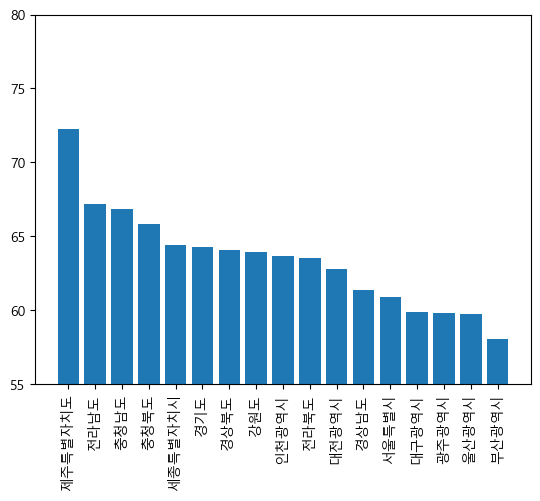

In [103]:
#전처리한 데이터 바탕으로 bar 그려보기
plt.bar(eco_ad_emp.index, eco_ad_emp['고용률(%)'])
plt.xticks(rotation=90)
plt.ylim(55,80)

plt.show()



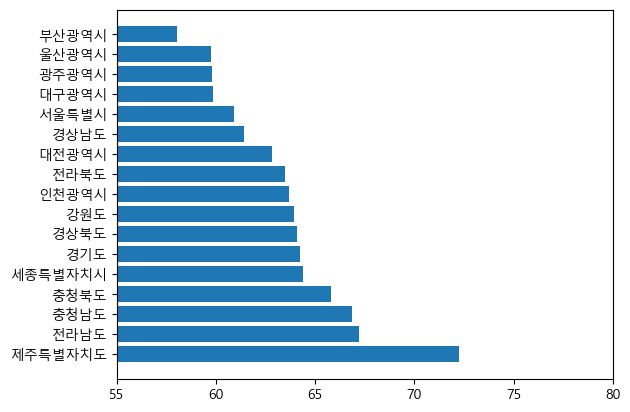

In [107]:
plt.barh(eco_ad_emp.index, eco_ad_emp['고용률(%)'])
# plt.xticks(rotation=90)
plt.xlim(55,80)

plt.show()


In [115]:
#행정구역별(성별 상관없이) 실업률
#groupby시 index화 안하기
eco_ad_un = economic[['행정구역(시도)','실업률(%)']].groupby('행정구역(시도)',as_index=False).mean()
eco_ad_un

,행정구역(시도),실업률(%)
0,강원도,2.45
1,경기도,2.40
2,경상남도,2.60
3,경상북도,2.25
4,광주광역시,2.30
5,대구광역시,2.35
6,대전광역시,1.55
7,부산광역시,2.90
8,서울특별시,3.05
9,세종특별자치시,1.45


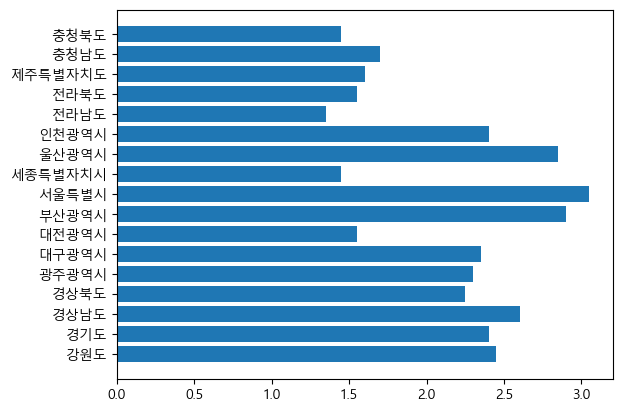

In [117]:
plt.barh(eco_ad_un['행정구역(시도)'],eco_ad_un['실업률(%)'])
plt.show()

### pie plot
- sizes : 크기를 나타내는 리스트
- labels : 각 파트의 이름
- autopct : 소수점 표시
- startangle : 시작 각도

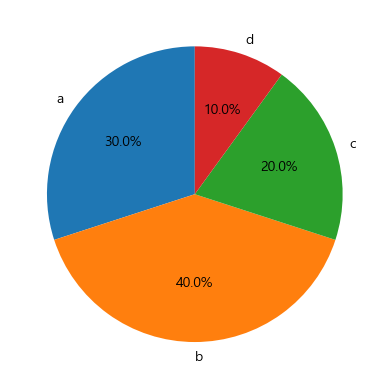

In [119]:
sizes = [30,40,20,10]
labels = ['a','b','c','d']

# plt.pie(sizes,labels,autopct,startangle)
plt.pie(sizes,labels=labels,autopct="%.1f%%",startangle=90)
plt.show()

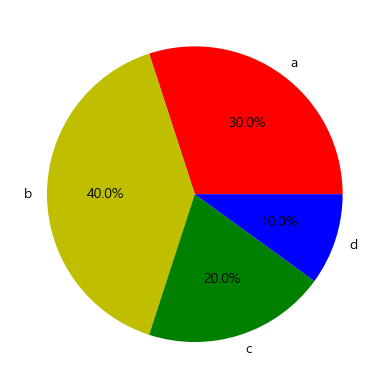

In [120]:
plt.pie(sizes,labels=labels,autopct="%.1f%%",colors=['r','y','g','b'])
plt.show()

In [121]:
import seaborn as sns

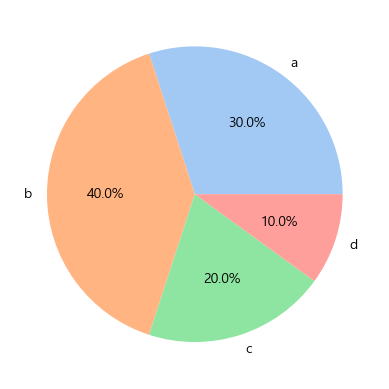

In [122]:
colors = sns.color_palette("pastel")
plt.pie(sizes,labels=labels,autopct="%.1f%%",colors=colors)
plt.show()

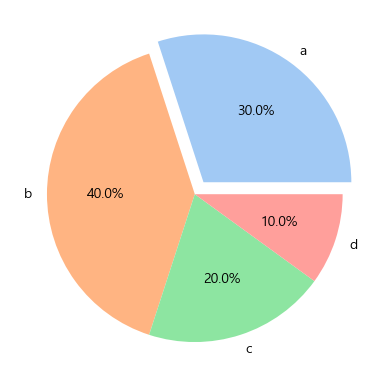

In [123]:
#explode = 분리시켜 강조
plt.pie(sizes,labels=labels,autopct="%.1f%%",colors=colors,explode=[0.1,0,0,0])
plt.show()